In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline
from fancyimpute import KNN
from scipy.stats import chi2_contingency


Using TensorFlow backend.


In [2]:
os.chdir("C:\\Users\MOULIESWARAN\Desktop\DS py code")
os.getcwd()

'C:\\Users\\MOULIESWARAN\\Desktop\\DS py code'

In [3]:
df = pd.read_csv("day.csv")
df.drop("instant",axis = 1,inplace= True)
df.shape

(731, 15)

In [4]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(10), object(1)
memory usage: 85.7+ KB


# Exploratory Data Analysis

Skewness: -0.047353
Kurtosis: -0.811922


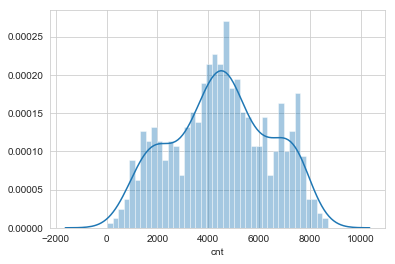

In [7]:
###Target Value Analysis
#check target variable is normal or not
sns.distplot(df['cnt'], bins = 40)
df['cnt'].describe()

print("Skewness: %f" % df['cnt'].skew())
print("Kurtosis: %f" % df['cnt'].kurt())

#Here Kurtosis is very less so the curve is less tailed and no outlier is present in target variable

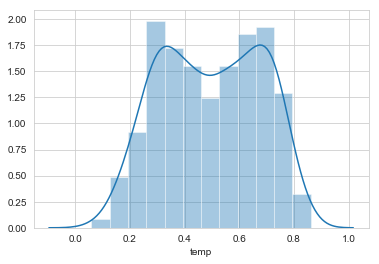

In [8]:
##############Distribution  independent numeric variables 
#Check whether  variable 'temp'is normal or not
sns.distplot(df['temp'])

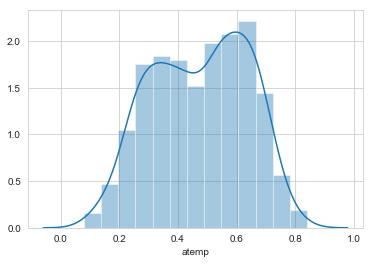

In [9]:
#Check whether  variable 'atemp'is normal or not
sns.distplot(df['atemp'])

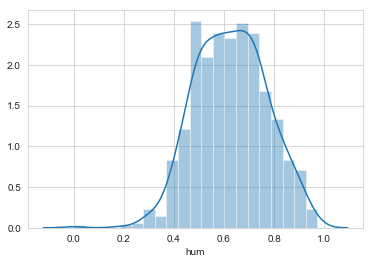

In [10]:
#Check whether  variable 'hum'is normal or not
sns.distplot(df['hum'])

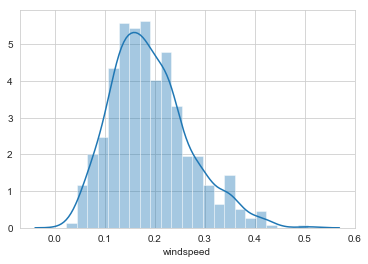

In [11]:
#Check whether  variable 'windspeed'is normal or not
sns.distplot(df['windspeed'])

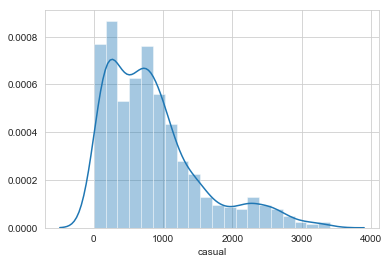

In [12]:

#Check whether  variable 'casual'is normal or not
sns.distplot(df['casual'])
# it is clearly showing that outlier is present in 'casual' variable

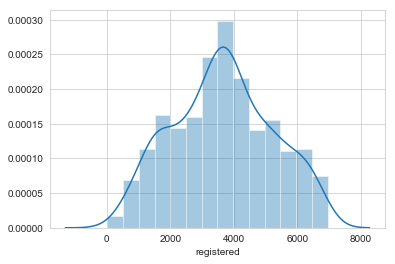

In [13]:

#Check whether  variable 'registered'is normal or not
sns.distplot(df['registered'])

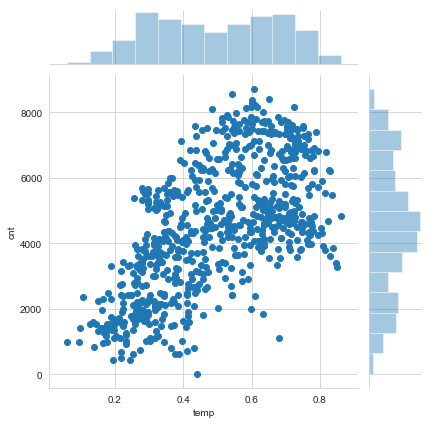

In [14]:
################ Bivariate  Relationship 
#relation between Numerical Variable 'temp' and target variable 'cnt'
sns.jointplot(x = 'temp' , y='cnt', data= df)

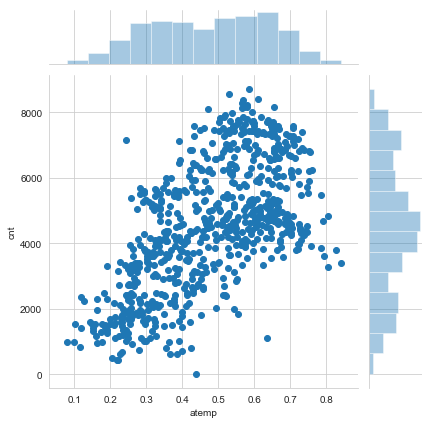

In [15]:
#relation between Numerical Variable 'atemp' and target variable 'cnt'
sns.jointplot(x = 'atemp' , y='cnt', data= df)

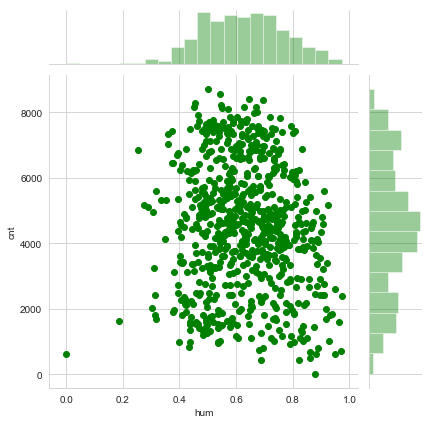

In [18]:
#relation between Numerical Variable 'hue' and target variable 'cnt'
sns.jointplot(x ='hum', y='cnt', data= df,color ="g")

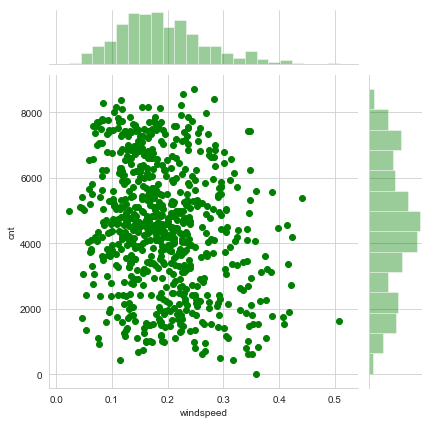

In [17]:
#relation between Numerical Variable 'windspeed' and target variable 'cnt'
sns.jointplot(x = 'windspeed' , y='cnt', data= df,color ="g")

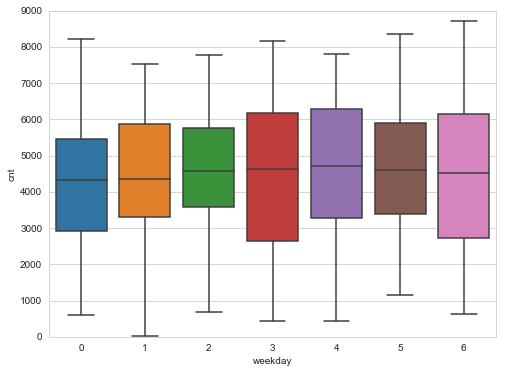

In [19]:
#box plot 'weekday' with 'CNT'
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x= 'weekday', y="cnt", data=df)
fig.axis(ymin=0, ymax=9000);

#all the weekdays median lying between 4000- 5000  

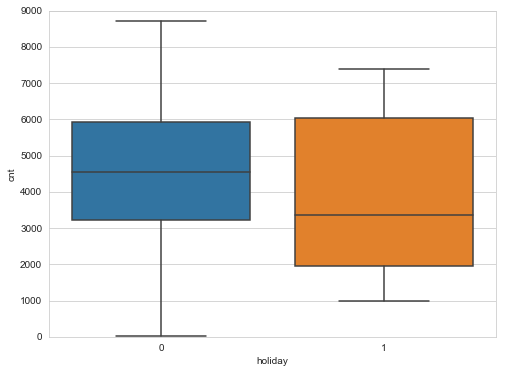

In [20]:
#box plot 'holiday' with 'CNT'
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x= 'holiday', y="cnt", data= df)
fig.axis(ymin=0, ymax=9000);

#median  high on  holidays when compare to weekdays

(-0.5, 1.5, 0, 9000)

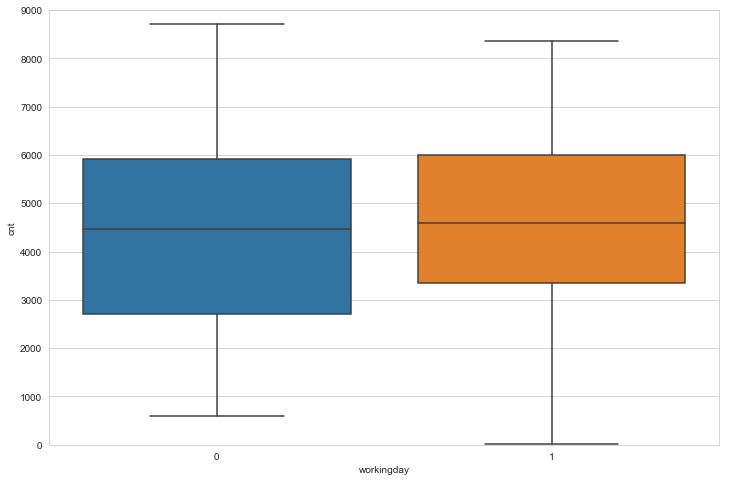

In [21]:
#box plot 'workingday' with 'CNT'
f, ax = plt.subplots(figsize = (12,8))
fig = sns.boxplot( x ='workingday' , y ='cnt',data = df)
fig.axis( ymin = 0, ymax = 9000)
#median around 4500

# Missing Value Analysis

In [22]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(df.isnull().sum())
missing_val
#no value is missing

,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
atemp,0


# Outlier Analysis

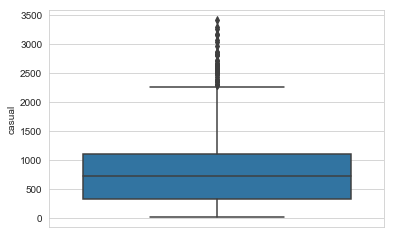

In [23]:
#boxplot before removing outlier
sns.boxplot(df['casual'],orient= "v")

In [24]:
# #Detect and delete outliers from data

cnames = ['casual']
for i in cnames:
    q75,q25 = np.percentile(df.loc[:,i],[75,25])
    iqr = q75 - q25
    
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr *1.5)
    
    df = df.drop( df[df.loc[:, i] <minimum ] .index)    
    df = df.drop( df[ df.loc[:,i] > maximum].index)

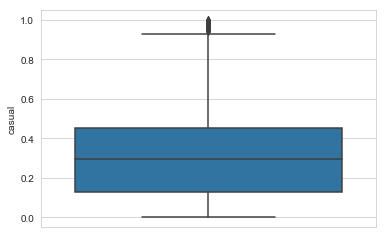

In [63]:
#boxplot after removing outlier
sns.boxplot(df['casual'],orient= "v")

# Feature Selection

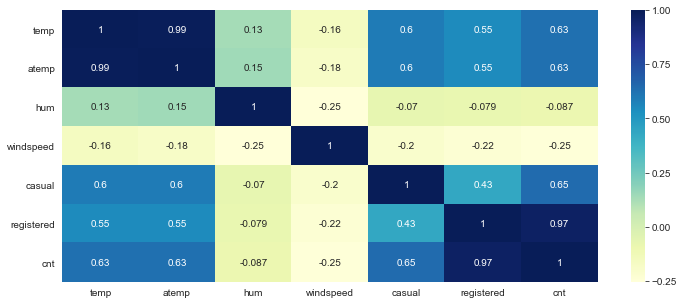

In [65]:
# "YlGnBu"
numeric_names = ['temp','atemp','hum','windspeed','casual','registered','cnt']
df_corr = df.loc[:,numeric_names]
# df_corr = df[[numeric_names]]
f,ax = plt.subplots( figsize = (12,5))
sns.heatmap( df_corr.corr(),annot= True, cmap ='YlGnBu')

# as per corrleation graph,there is strong relation b/w Independent variable 'temp' and 'atemp'
# There is a   poor relation b/w  Independent variable 'hum' and dependent  variable 'cnt'

C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


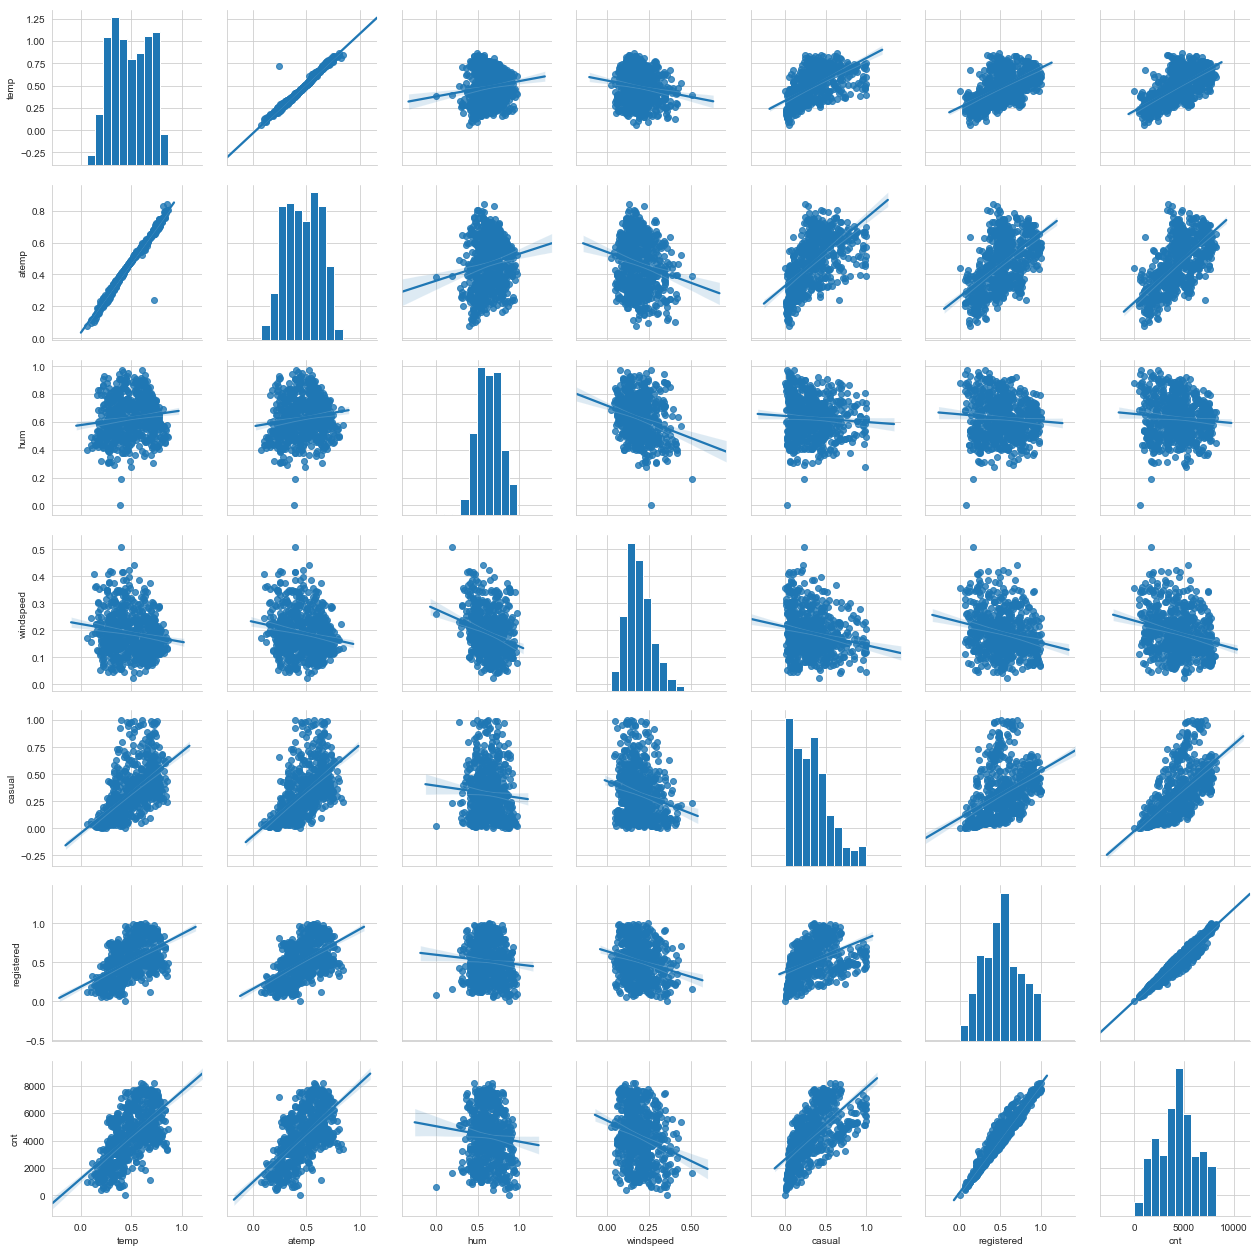

In [62]:

cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
sns.pairplot(df[cols], size = 2.5,kind="reg")
plt.show()

# Feature Scaling

In [30]:
cnames = ['casual','registered']

for i in cnames:
    print(i)
    df[i] =( df[i] - min(df[i]) ) / (max(df[i]) - min( df[i]))

casual
registered


# Model Development

In [31]:
#diividing  Test and train data  using skilearn   train_test_split 

df_feature_selection = df.drop(['atemp','hum'],axis = 1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(df_feature_selection.iloc[:,1:-1],df_feature_selection['cnt'], test_size=0.2)


### Evaluation Metrics

In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score

def RMSE(y_actual, y_predict, Train = False):
    
    mape = np.mean(np.abs((y_actual - y_predict) / y_predict))*100
    if Train:
        print(" Trained Model performance:  ")
  
    else:
        print(" Predicted Model performance:  ")
    print(" MAPE: \t",mape)
#         print(" MSE: \t",mean_squared_error(y_actual, y_predict))    
    print("RMSE: \t", np.sqrt(mean_squared_error(y_actual, y_predict)))
    print(" r^2 : \t", explained_variance_score(y_actual, y_predict))
        
 

### Decision tree

In [54]:
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor(max_depth=10,min_samples_split=2,max_leaf_nodes=46)
DT.fit(X_train,y_train)
predictions_DT = DT.predict(X_test)
RMSE(y_test,predictions_DT)



 Predicted Model performance:  
 MAPE: 	 5.50512811492482
RMSE: 	 234.86986617776998
 r^2 : 	 0.9828028041478777


In [34]:
##Overfitting and Grid search with Decision tree

from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2,50)),
         'min_samples_split': list(range(2,10))      }


gs_CV_DT = GridSearchCV(DecisionTreeRegressor(random_state =42),params,n_jobs=1, verbose= 1)

gs_CV_DT.fit(X_train,y_train)

print(gs_CV_DT.best_estimator_)

predict_GS = gs_CV_DT.predict(X_test)

print(" GS_CS_DT:" )

RMSE(y_test,predict_GS,False)


C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 384 candidates, totalling 1152 fits
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=46, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')
 GS_CS_DT:
 Predicted Model performance:  
 MAPE: 	 5.50512811492482
RMSE: 	 234.86986617776998
 r^2 : 	 0.9828028041478777


[Parallel(n_jobs=1)]: Done 1152 out of 1152 | elapsed:    5.7s finished


In [35]:
### Bagging(oob_score = False)
from sklearn.ensemble import BaggingRegressor
BR = BaggingRegressor(base_estimator= DT , n_estimators= 50, bootstrap= True, n_jobs= -1,random_state= 42) 
BR.fit(X_train,y_train)
predictions_BR = BR.predict(X_test)
RMSE(y_test,predictions_BR)

 Predicted Model performance:  
 MAPE: 	 2.519456031778582
RMSE: 	 129.69598807750606
 r^2 : 	 0.9947129681132323


In [70]:
### Bagging(oob_score= True)
BR_T= BaggingRegressor(base_estimator= DT , n_estimators= 500, bootstrap= True, n_jobs= -1,oob_score= True,random_state= 42) 
BR_T.fit(X_train,y_train)
predictions_BR_T = BR_T.predict(X_test)
RMSE(y_test,predictions_BR_T,False)

 Predicted Model performance:  
 MAPE: 	 2.4778200341449867
RMSE: 	 123.73564452078845
 r^2 : 	 0.9951845056902959


In [73]:
# Create dot file to visualise tree  #http://webgraphviz.com/
from sklearn.tree import export_graphviz
dotfile = open("pt1.dot", 'w')
df = export_graphviz(DT, out_file=dotfile)

## Random Forest

In [38]:
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor(n_estimators=500, random_state= 43 ).fit(X_train,y_train)

print(RF_model)
# Predict the model using predict funtion

RF_predict= RF_model.predict(X_test)

# print(RF_predict)

RMSE(y_test,RF_predict,False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=43, verbose=0, warm_start=False)
 Predicted Model performance:  
 MAPE: 	 1.811890372337156
RMSE: 	 102.35520678004372
 r^2 : 	 0.9967067192081186


In [75]:
##Random forest with GridSearchCV

params = {'max_depth': list(range(2,10)),
         'min_samples_split': list(range(2,20))      }

gs_CV_RF = GridSearchCV(RandomForestRegressor(random_state =42), params,n_jobs=1, verbose= 1)

gs_CV_RF.fit(X_train,y_train)

# print(gs_CV_RF.best_estimator_)

predict_GS_RF = gs_CV_RF.predict(X_test)

# print(" GS_CS_RF:" )

RMSE(y_test,predict_GS_RF,False)

# Predicted Model performance:  
#  MAPE: 	 2.2474260956323886
# RMSE: 	 122.59138072490313
#  r^2 : 	 0.9952880921987182

C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in versi

Fitting 3 folds for each of 144 candidates, totalling 432 fits


C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-package

C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-package

C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-package

C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-package

C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-package

C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-package

C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-package

C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-package

C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-package

C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-package

C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-package

C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-package

 Predicted Model performance:  
 MAPE: 	 2.2474260956323886
RMSE: 	 122.59138072490313
 r^2 : 	 0.9952880921987182


[Parallel(n_jobs=1)]: Done 432 out of 432 | elapsed:   20.4s finished
C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [40]:
### Random forest with Adaboost
from sklearn.ensemble import AdaBoostRegressor

ADR = AdaBoostRegressor(RandomForestRegressor(random_state = 42 )).fit(X_train,y_train)

predict_ADR = ADR.predict(X_test)

RMSE(y_test, predict_ADR)

# predict_ADR_train = ADR.predict(X_train)
# RMSE(y_train, predict_ADR_train,True)

#  Predicted Model performance:  
#  MAPE: 	 1.876785996208119
# RMSE: 	 92.99576856510457
#  r^2 : 	 0.997280744248804

C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-package

 Predicted Model performance:  
 MAPE: 	 1.876785996208119
RMSE: 	 92.99576856510457
 r^2 : 	 0.997280744248804


C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-package

### Gradient Boost Regressor

In [56]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor().fit(X_train,y_train)

predict_GBR = GBR.predict(X_test)
RMSE(y_test,predict_GBR)
print()
predict_GBR_train = GBR.predict(X_train)
RMSE(y_train, predict_GBR_train,True)


 Predicted Model performance:  
 MAPE: 	 1.8026405197137298
RMSE: 	 94.00491268028102
 r^2 : 	 0.9972375609764936

 Trained Model performance:  
 MAPE: 	 1.1319855375324281
RMSE: 	 47.92583905842076
 r^2 : 	 0.9993534865217092


### Extra Tree Regressor

In [42]:
from sklearn.ensemble import ExtraTreesRegressor

ETR = ExtraTreesRegressor(max_leaf_nodes= 49, min_samples_split= 2, random_state= 42).fit(X_train,y_train)
ETR_predict = ETR.predict(X_test)

RMSE(y_test, ETR_predict)

 Predicted Model performance:  
 MAPE: 	 3.606318093363279
RMSE: 	 160.37910721190343
 r^2 : 	 0.9920220180584598


C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### SVM

In [43]:
from sklearn.svm import SVR

SVR_model = SVR(kernel= 'linear').fit(X_train,y_train )

predict_SVR = SVR_model.predict(X_test)
RMSE(y_test,predict_SVR,False)


 Predicted Model performance:  
 MAPE: 	 30.69384168308883
RMSE: 	 1629.2710085825695
 r^2 : 	 0.16502003555045375


In [44]:
# to improve the svr performance using GridSearchCV

from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001] }

gs_SVR = GridSearchCV(SVR(),param_grid,verbose= 3)
gs_SVR.fit(X_train,y_train )

predict_gs_SVR = gs_SVR.predict(X_test)
RMSE(y_test,predict_gs_SVR,False)

# Predicted Model performance:  
#  MAPE: 	 11.382522100990977
# RMSE: 	 623.6686693168526
#  r^2 : 	 0.8776593313366965

C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...... C=0.1, gamma=1, score=-0.014885402558001859, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...... C=0.1, gamma=1, score=-0.004986084575955285, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ....... C=0.1, gamma=1, score=-0.01634102351088118, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .... C=0.1, gamma=0.1, score=-0.013320216050922042, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .... C=0.1, gamma=0.1, score=-0.003179947015863327, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .... C=0.1, gamma=0.1, score=-0.014577103510404088, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ... C=0.1, 

[CV] C=1000, gamma=1 .................................................
[CV] ........ C=1000, gamma=1, score=0.6857469041586017, total=   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] ........ C=1000, gamma=1, score=0.7358964794453434, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...... C=1000, gamma=0.1, score=0.8771773829014796, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...... C=1000, gamma=0.1, score=0.8663937135704572, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...... C=1000, gamma=0.1, score=0.9147057207675942, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..... C=1000, gamma=0.01, score=0.8010901374421122, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..... C=1000, gamma=0.01, score=0.7756044161048324, total=   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.1s finished


### KNeighborsRegressor

In [45]:
from sklearn.neighbors import KNeighborsRegressor
KNN_model = KNeighborsRegressor(n_neighbors=3).fit(X_train,y_train)

print(KNN_model)
# Predict the model using predict funtion
KNN_predict= KNN_model.predict(X_test)

# print(KNN_predict)
RMSE(y_test,KNN_predict,False)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')
 Predicted Model performance:  
 MAPE: 	 14.013064354464442
RMSE: 	 775.8395976749645
 r^2 : 	 0.8106780123787405


### Navie bayes

In [46]:
# from sklearn.naive_bayes import GaussianNB

# NB_model = GaussianNB().fit(X_train,y_train)
# print(NB_model)
# NB_predict = NB_model.predict(X_test)

# # print(NB_predict)
# RMSE(y_test,NB_predict,False)


# GaussianNB(priors=None, var_smoothing=1e-09)
#  Predicted Model performance:  
#  MAPE: 	 23.12399216826324
# RMSE: 	 1534.1133373659386
#  r^2 : 	 0.2749071926819965

GaussianNB(priors=None, var_smoothing=1e-09)
 Predicted Model performance:  
 MAPE: 	 23.12399216826324
RMSE: 	 1534.1133373659386
 r^2 : 	 0.2749071926819965


### Logistic Regression

In [47]:
# from sklearn.linear_model import LogisticRegression

# df_logit =  df.iloc[:, :-1].copy()

# categoric_names = ['season','yr','mnth','holiday','weekday',"workingday",'weathersit']


# for i in categoric_names:
#     temp = pd.get_dummies(df_logit[i],prefix = i,drop_first= True)
#     df_logit = df_logit.join(temp)
# df_logit = df_logit.join(df['cnt'])

# df_logit.drop(categoric_names,axis =1, inplace = True)
# # df_logit.head(2)
# # df_logit.info()

# Sample_Index = np.random.rand(len(df_logit)) < 0.8

# train = df_logit[Sample_Index]
# test = df_logit[~Sample_Index]

# log_reg = LogisticRegression().fit(train.iloc[:,1:-1],train['cnt'] )

# predict_log_reg = log_reg.predict(test.iloc[:,1:-1])
# RMSE(test['cnt'],predict_log_reg,False)


#  Predicted Model performance:  
#  MAPE: 	 23.675179168470777
# RMSE: 	 1345.5872074435833
#  r^2 : 	 0.4547799632286841

C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MOULIESWARAN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


 Predicted Model performance:  
 MAPE: 	 23.675179168470777
RMSE: 	 1345.5872074435833
 r^2 : 	 0.4547799632286841


### Linear Regression¶

In [50]:
### Linear model
from sklearn.linear_model import LinearRegression

LR = LinearRegression().fit(X_train,y_train )

predict_LR_1 = LR.predict(X_test)
predict_LR_2 = LR.predict(X_train)

RMSE(y_test,predict_LR_1,False)
print()
RMSE(y_train,predict_LR_2,True)

 Predicted Model performance:  
 MAPE: 	 1.6878705219396843e-13
RMSE: 	 6.092521385302794e-12
 r^2 : 	 1.0

 Trained Model performance:  
 MAPE: 	 2.1991944574638387e-13
RMSE: 	 5.51276746691628e-12
 r^2 : 	 1.0


In [57]:
### OLS method

import statsmodels.api as sm

#develop Linear Regression model using sm.ols

linear_regression_model = sm.OLS(y_train,X_train).fit()

#Summary of model
print(linear_regression_model.summary())

predict_LR = linear_regression_model.predict(X_test)
RMSE(y_test,predict_LR)

print()

predict_LRt = linear_regression_model.predict(X_train)
RMSE(y_train,predict_LRt,True)

# Predicted Model performance:  
#  MAPE: 	 0.12250034832524803
# RMSE: 	 3.83534948719757
#  r^2 : 	 0.9999955704498927

#  Trained Model performance:  
#  MAPE: 	 0.15290192693168161
# RMSE: 	 3.6508035897941693
#  r^2 : 	 0.9999963517235975

#Linear regression is the best model for the day dataset

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.194e+07
Date:                Thu, 06 Jun 2019   Prob (F-statistic):               0.00
Time:                        17:15:35   Log-Likelihood:                -1489.9
No. Observations:                 549   AIC:                             3002.
Df Residuals:                     538   BIC:                             3049.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season         0.6211      0.279      2.225      0.0

Conclusion:

#Linear regression is the best model for the given dataset